 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

In [3]:
# All Paths to CSV
whale_returns_csv = Path("whale_returns.csv")
algo_returns_csv = Path("algo_returns.csv")
sp500_history_csv = Path("sp500_history.csv")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
whale_returns_df = pd.read_csv(
    whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14564\669123737.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns_df = pd.read_csv(


In [7]:
# Count nulls
null_count= whale_returns_df.isnull().sum()
print(null_count)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [8]:
# Drop nulls
whale_returns_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [10]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(
    algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14564\996474224.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns_df = pd.read_csv(


In [11]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_returns_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv(
    sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14564\3988090822.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_history_df = pd.read_csv(
C:\Users\user\AppData\Local\Temp\ipykernel_14564\3988090822.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history_df = pd.read_csv(


In [15]:
# Check Data Types
sp500_history_df.dtypes
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


# Fix Data Types


In [17]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '').astype(float)
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [18]:
# Calculate Daily Returns
sp500_history_df= sp500_history_df.sort_index()
sp500_returns= sp500_history_df.pct_change()
print(sp500_returns)

               Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1649 rows x 1 columns]


In [19]:
# Drop nulls
sp500_returns.dropna(inplace=True)

In [20]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns= sp500_returns.rename(columns={'Close': 'Sp500_Returns'})
sp500_returns.head()

,Sp500_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_returns], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

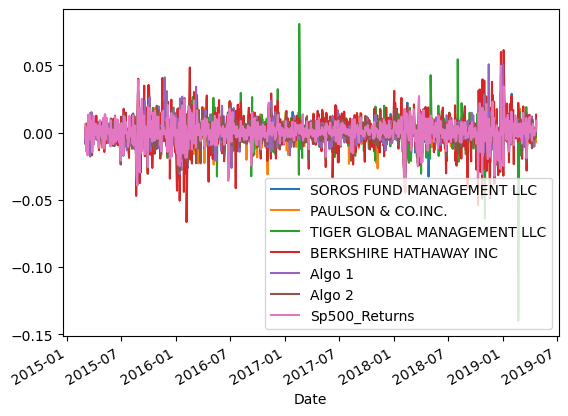

In [26]:
# Plot daily returns of all portfolios
combined_returns.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

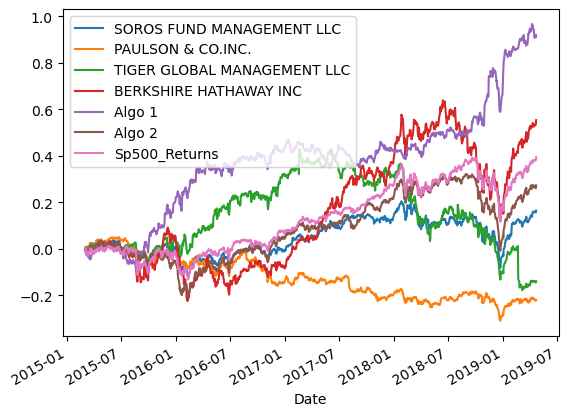

In [28]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot()



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

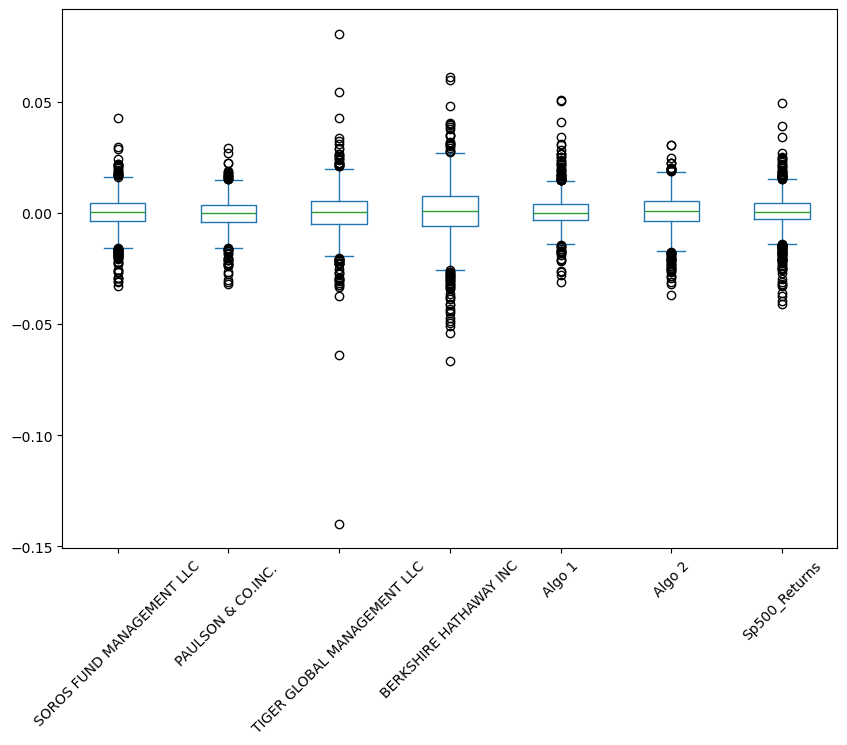

In [32]:
# Box plot to visually show risk
combined_returns.plot.box(rot=45, figsize=(10, 7))

### Calculate Standard Deviations

In [34]:
# Calculate the daily standard deviations of all portfolios
sp500_daily_std = cumulative_returns.std()
sp500_daily_std.head()

SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
TIGER GLOBAL MANAGEMENT LLC    0.149844
BERKSHIRE HATHAWAY INC         0.241575
Algo 1                         0.230581
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [36]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = sp500_daily_std[sp500_daily_std > sp500_daily_std['Sp500_Returns']]
print("Portfolios riskier than the S&P 500:")
print(riskier_portfolios)

Portfolios riskier than the S&P 500:
TIGER GLOBAL MANAGEMENT LLC    0.149844
BERKSHIRE HATHAWAY INC         0.241575
Algo 1                         0.230581
dtype: float64


### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized standard deviation (252 trading days)
std_dev = np.std(sp500_daily_std)
annualized_std_dev = std_dev * np.sqrt(252)
print("Annualized Standard Deviation:", annualized_std_dev)

Annualized Standard Deviation: 0.9464934446738194


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

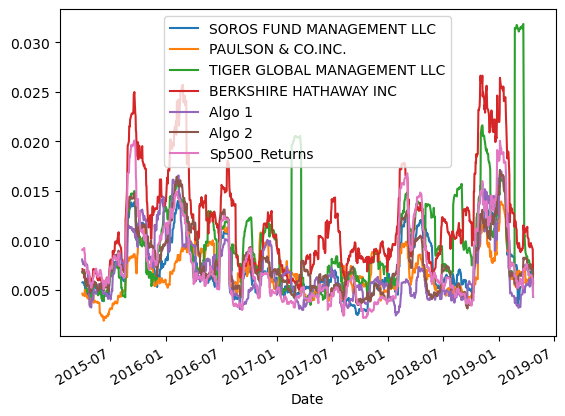

In [42]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

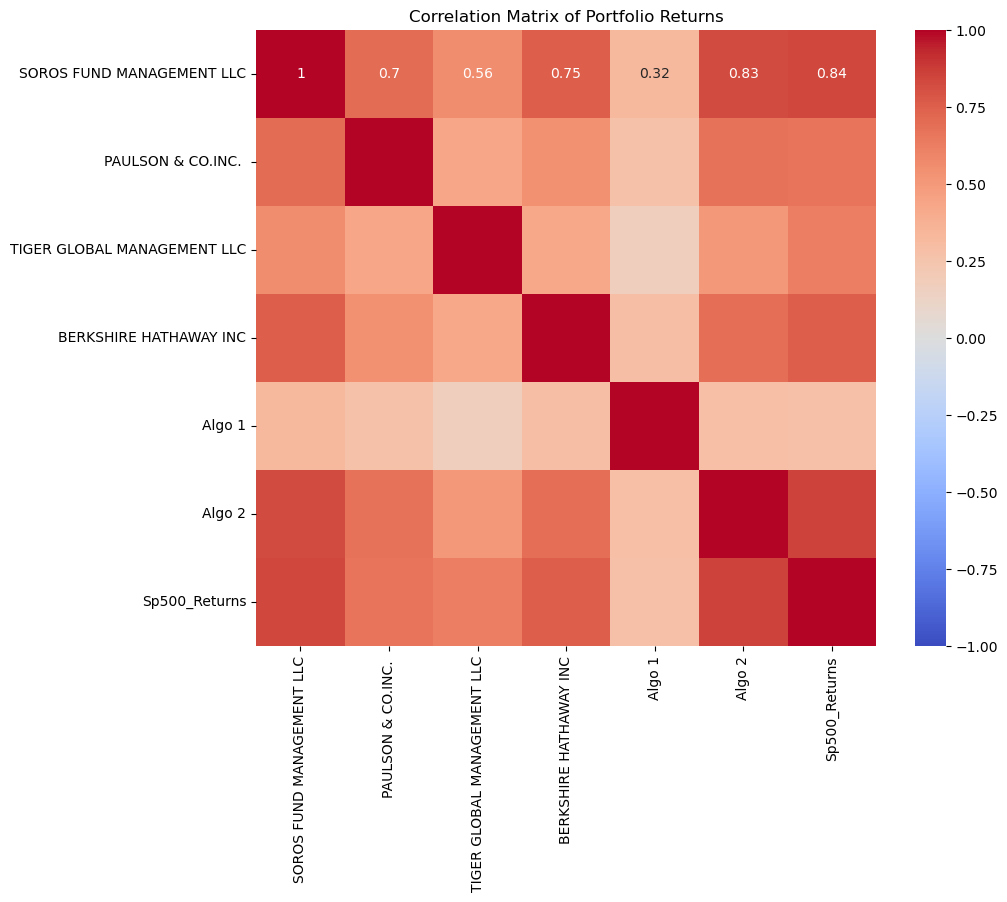

In [44]:
# Calculate the correlation
correlation_matrix = combined_returns.corr()

# Display de correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Portfolio Returns')
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Beta Trend'}, xlabel='Date'>

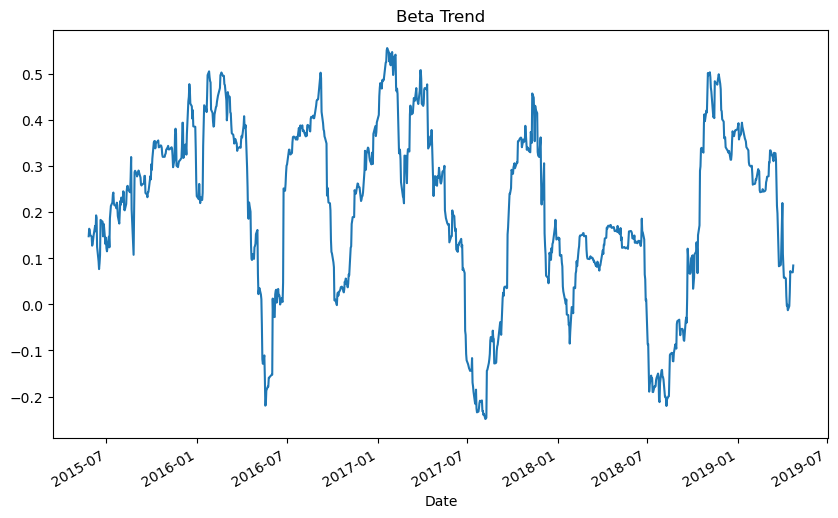

In [46]:
# Calculate covariance of a single portfolio
covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['Sp500_Returns'])

# Calculate variance of S&P 500
variance = combined_returns['Sp500_Returns'].rolling(window=60).var()

# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(10, 6), title='Beta Trend')



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [48]:
# Use `ewm` to calculate the rolling window
covariance = combined_returns['Algo 1'].ewm(span=60).cov(combined_returns['Sp500_Returns'])
variance = combined_returns['Sp500_Returns'].ewm(span=60).var()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios'}>

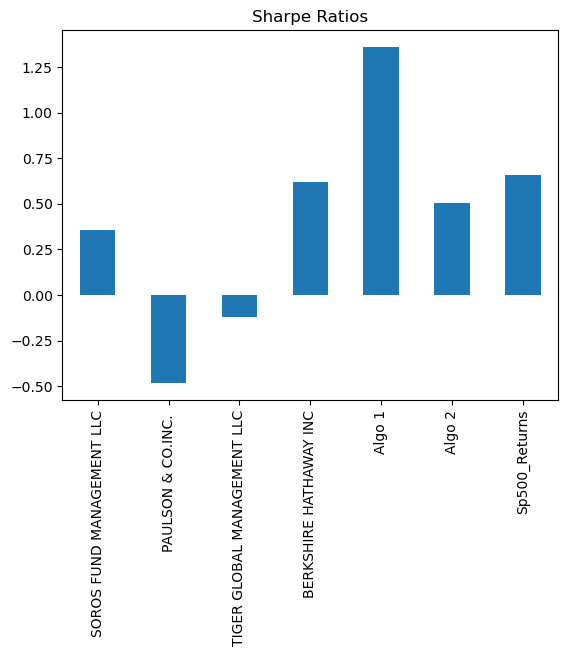

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [57]:
# Create Path to CSV File 
smci_data= Path("smci_data.csv")
amd_data= Path("amd_data.csv")
nvda_data= Path("nvda_data.csv")

In [58]:
# Reading data from 1st stock
smci= pd.read_csv(smci_data,
                  index_col="Date", parse_dates=True)
smci= smci.rename(columns={'Close': 'SMCI'})
#smci.index = smci.index.normalize()
smci

,SMCI
Date,
2020-01-02 16:00:00,23.63
2020-01-03 16:00:00,23.44
2020-01-06 16:00:00,23.27
2020-01-07 16:00:00,23.10
2020-01-08 16:00:00,23.07
...,...
2022-12-23 16:00:00,82.19
2022-12-27 16:00:00,82.89
2022-12-28 16:00:00,80.60


In [59]:
# Reading data from 2nd stock
amd= pd.read_csv(amd_data, 
                 index_col="Date", parse_dates=True)
amd= amd.rename(columns={'Close': 'AMD'})
#amd.index = amd.index.normalize()
amd


,AMD
Date,
2020-01-02 16:00:00,49.10
2020-01-03 16:00:00,48.60
2020-01-06 16:00:00,48.39
2020-01-07 16:00:00,48.25
2020-01-08 16:00:00,47.83
...,...
2022-12-23 16:00:00,64.52
2022-12-27 16:00:00,63.27
2022-12-28 16:00:00,62.57


In [60]:
# Reading data from 3rd stock
nvda=pd.read_csv(nvda_data,
                 index_col="Date", parse_dates=True)
nvda= nvda.rename(columns={'Close': 'NVDA'})
#nvda.index = nvda.index.normalize()
nvda

,NVDA
Date,
2020-01-02 16:00:00,59.98
2020-01-03 16:00:00,59.02
2020-01-06 16:00:00,59.27
2020-01-07 16:00:00,59.98
2020-01-08 16:00:00,60.10
...,...
2022-12-23 16:00:00,152.06
2022-12-27 16:00:00,141.21
2022-12-28 16:00:00,140.36


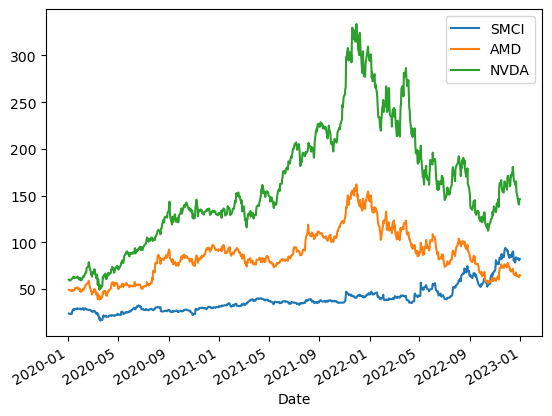

In [61]:
# Combine all stocks in a single DataFrame
combined_stock_data= combined_stock_data = pd.concat([smci, amd, nvda], axis='columns', join='inner')
combined_stock_data.plot()
combined_stock_data.dropna(inplace=True)


In [62]:
# Reset Date index
combined_stock_data.index = combined_stock_data.index.normalize()

In [63]:
# Reorganize portfolio data by having a column per symbol

combined_stock_data.columns.values[0] = 'SMCI'
combined_stock_data.columns.values[1] = 'AMD'
combined_stock_data.columns.values[2] = 'NVDA'
combined_stock_data

,SMCI,AMD,NVDA
Date,,,
2020-01-02,23.63,49.10,59.98
2020-01-03,23.44,48.60,59.02
2020-01-06,23.27,48.39,59.27
2020-01-07,23.10,48.25,59.98
2020-01-08,23.07,47.83,60.10
...,...,...,...
2022-12-23,82.19,64.52,152.06
2022-12-27,82.89,63.27,141.21
2022-12-28,80.60,62.57,140.36


In [64]:
# Calculate daily returns
daily_returns = combined_stock_data.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns.head()

,SMCI,AMD,NVDA
Date,,,
2020-01-03,-0.008041,-0.010183,-0.016005
2020-01-06,-0.007253,-0.004321,0.004236
2020-01-07,-0.007306,-0.002893,0.011979
2020-01-08,-0.001299,-0.008705,0.002001
2020-01-09,0.005635,0.023834,0.010982


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [66]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = combined_stock_data.dot(weights)

# Display sample data
portfolio_return.head()

Date
2020-01-02    44.236667
2020-01-03    43.686667
2020-01-06    43.643333
2020-01-07    43.776667
2020-01-08    43.666667
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [68]:
# Join your returns DataFrame to the original returns DataFrame
merged_returns = pd.concat([combined_returns, combined_stock_data], axis=1)
merged_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Returns,SMCI,AMD,NVDA
Date,,,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.19,64.52,152.06
2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.89,63.27,141.21
2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.60,62.57,140.36


In [69]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
cleaned_return = merged_returns.dropna()
cleaned_return


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Returns,SMCI,AMD,NVDA
Date,,,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [72]:
# Calculate the annualized `std`
std_dev = np.std(merged_returns, axis=0)
annualized_std = std_dev * np.sqrt(252)
print("Annualized Standard Deviation:", annualized_std_dev)

Annualized Standard Deviation: 0.9464934446738194


### Calculate and plot rolling `std` with 21-day window

<Figure size 1000x600 with 0 Axes>

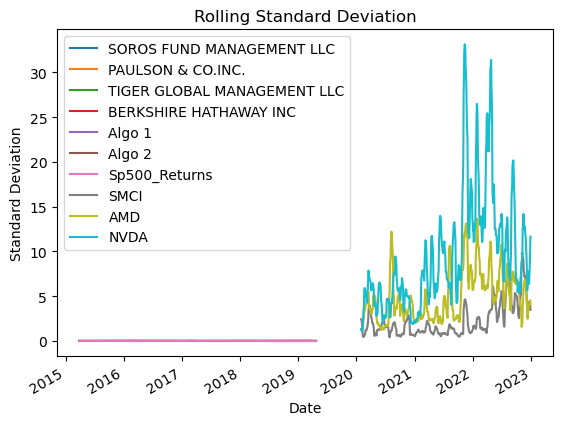

In [74]:
# Calculate rolling standard deviation
rolling_std = merged_returns.rolling(window=21).std()


# Plot rolling standard deviation
plt.figure(figsize=(10, 6))
rolling_std.plot(title='Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.show()


### Calculate and plot the correlation

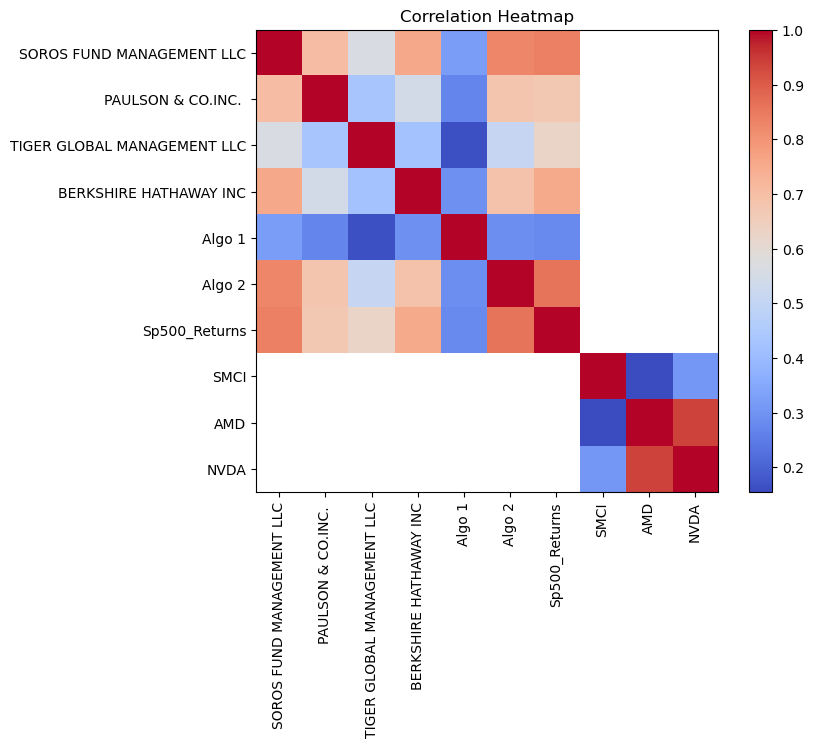

In [76]:
# Calculate and plot the correlation
correlation = merged_returns.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.show()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Beta Trend'}, xlabel='Date'>

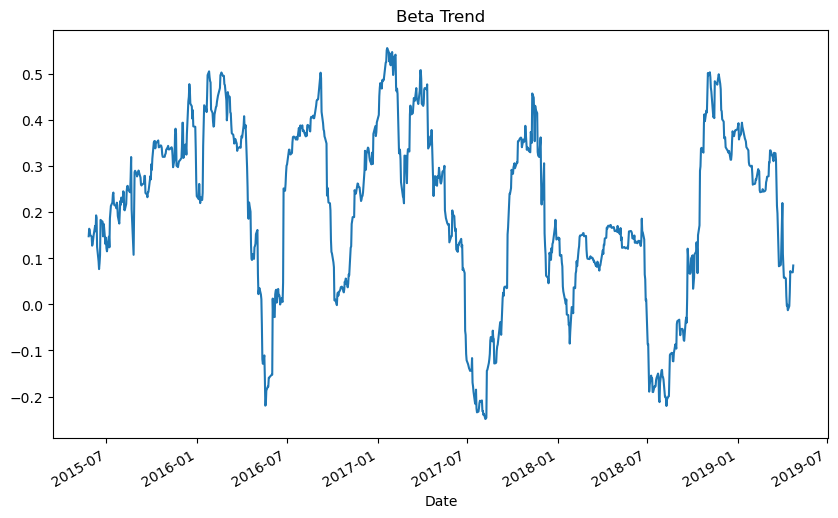

In [85]:
# Calculate and plot Beta
covariance = merged_returns['SMCI'].rolling(window=60).cov(merged_returns['NVDA'])
variance = merged_returns['Sp500_Returns'].rolling(window=60).var()
merged_beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(10, 6), title='Beta Trend')



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [87]:
# Calculate Annualized Sharpe Ratios
merge_sharpe_ratio = (merged_returns.mean() * 252) / (merged_returns.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios'}>

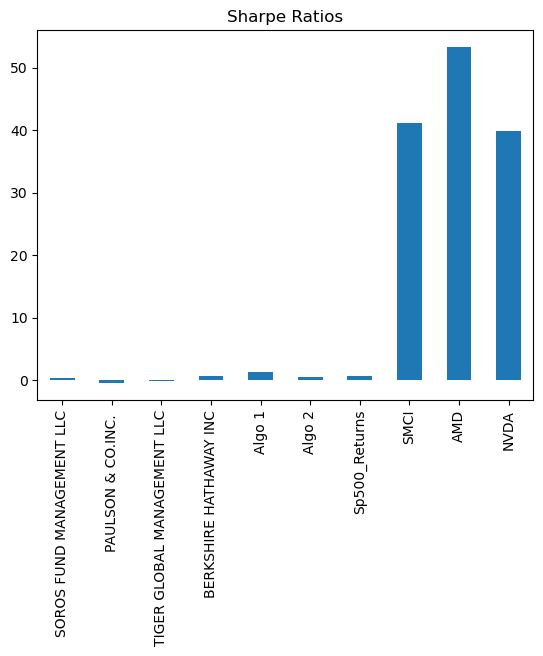

In [91]:
# Visualize the sharpe ratios as a bar plot
merge_sharpe_ratio.plot(kind='bar', title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio shows information that it was outperformed by the previous portfolio, however given 
that the previous portfolio has an earlier date index. There is a lack of correlation between the two 
dataframes. 